In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [8]:
n = 4     
m = 1000

#Вклад i элемента массива
def fi(ep, x, i):
    mult = 1
    for j in range(n):
        if(i != j):
            mult *= ep - x[j]
            mult /= x[i] - x[j]
    return mult

def ji1(ep, x, i):
    return -9 / 2 *(ep - 1/3)*(ep - 2/3)*(ep - 1)

def ji2(ep, x, i):
    return 27/2* ep *(ep-2/3)*(ep-1)

def ji3(ep, x, i):
    return -27/2* ep *(ep-1/3)*(ep-1)

def ji4(ep, x, i):
    return 9/2* ep *(ep-2/3)*(ep-1/3)


#Значение функции в точке ep
def f(ep, x, y):
    sum = 0
    for i in range(n):
        sum += y[i] * fi(ep, x, i)
    return sum


In [9]:
b = 1 #При разбиении с остатком остаток добавлять в последний или рисовать свой

xrange = []
yrange = []

xp = [0, 1, 2, 3]
yp = [4, 3, 2, 1]

x = []
y = []
k = int((len(xp) - 1) / (n-1))

#Проверка на разбиение без остатка
p = len(xp) - 1 - (n-1) * k

lastn = n

for j in range(k):
    s = (n-1)*j
    if j == k-1 and b == 1 and p != 0:
        n += p
    x += [xp[s: s + n]]
    y += [yp[s: s + n]]
    for i in np.linspace(x[j][0], x[j][-1], m):
        xrange += [i]
        yrange += [f(i, x[j], y[j])]
n = lastn

#если количество элементов не кратно (n-1)*k - 1,  k ∈ N
if b == 0 and p != 0:
    x += [xp[(n-1)*k: (n-1)*k + p + 1]]
    y += [yp[(n-1)*k: (n-1)*k + p + 1]]
    for i in range(n - p - 1):
        x[k] += [2 * x[k][-1] - x[k][-2]]
        y[k] += [2 * y[k][-1] - y[k][-2]] 
    for i in np.linspace(x[k][0], x[k][p], m):
        xrange += [i]
        yrange += [f(i, x[k], y[k])]

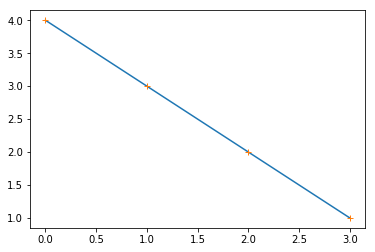

In [10]:
plt.plot(xrange, yrange)
plt.plot(xp, yp, "+")

In [57]:
#Поиск значений в точках
def Find(X):
    for j in range(k):
        if x[j][0] <= X <= x[j][-1]:
            return f(X, x[j], y[j])
    if p != 0:
        if x[k][0] <= x <= x[k][p]:
            return f(X, x[k], y[k])
    return 'Ошибка'

In [214]:
Find(2)

8.0

In [213]:
Find(0)

0.0

In [215]:
Find(0.5)

0.125